<h1> Euclidean degrees

Want something a basis set with cardinality somewhere between a total order and a tensor grid? Then a Euclidean degree [1] might be just right for you! These index sets are available in Effective Quadratures, can be used with effective quadrature subsampling. Here is quick demo in 2D

In [1]:
%matplotlib inline
from effective_quadratures.indexset import IndexSet
from effective_quadratures.parameter import Parameter
from effective_quadratures.effectivequads import EffectiveSubsampling
from effective_quadratures.plotting import coeffplot2D
import numpy as np

We begin by defining a Euclidean degree index set

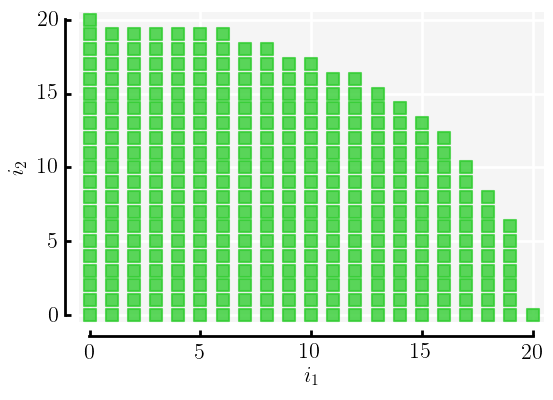

In [2]:
euclid = IndexSet('Euclidean degree', [20,20])
euclid.plot()

For comparison, note that a total order basis would give us...

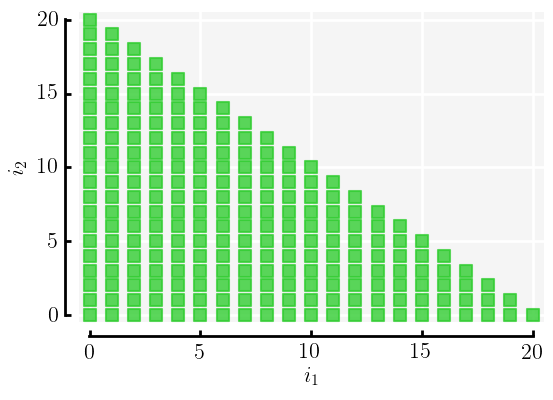

In [3]:
total = IndexSet('Total order', [20,20])
total.plot()

Ok, so now lets sketch a quick problem. Assume our complex model is given by:

In [4]:
def very_complex_model(x):
    return np.exp(x[0] + x[1])

Now set up the basics for subsampling from a tensor grid with order [20,20]. Remember that order 20 in each direction corresponds to 21 points per direction!

In [11]:
x1 = Parameter(param_type="Uniform", lower=-1, upper=1, points=21)
tensor = IndexSet('Tensor grid', [20, 20])
effective = EffectiveSubsampling([x1,x1], tensor)

Now, we must determine the least number of subsamples at which to evaluate this very complex model. Recall, this will be determined by the number of basis terms. 

In [12]:
minimum_evals = effective.least_no_of_subsamples_reqd()
effective.set_no_of_evals(minimum_evals)

Now let us plot the coefficients. 

In [13]:
coefficients, cond = effective.computeCoefficients(very_complex_model)

Note that the *computeCoefficients()* function also returns the condition number of the matrix used in the least squares computation. This is useful for assessing how stable the least squares solve is

In [14]:
print cond

1.0


Perfect, its relatively small. Now let us plot the coefficients...

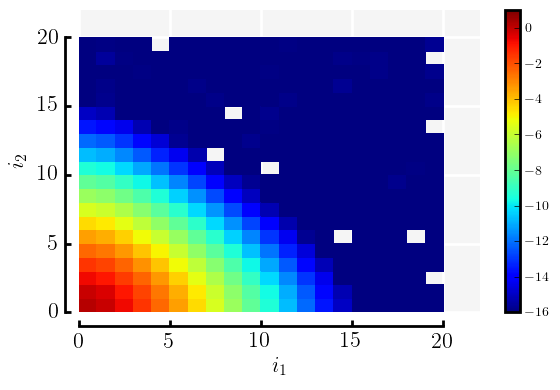

In [16]:
coeffplot2D(coefficients, tensor, r'$i_1$', r'$i_2')

In [17]:
print minimum_evals

441


In [18]:
print tensor.cardinality

441


In [19]:
print len(effective.subsampled_quadrature_points)

441
